# 0. Imports 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
from pickle import dump

# 1. Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
data.to_csv("C:/Users/manue/Desktop/Github/alternative_time_series_project/data/raw/sales.csv", index=False)

In [3]:
df = pd.read_csv("../data/raw/sales.csv",)
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [4]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


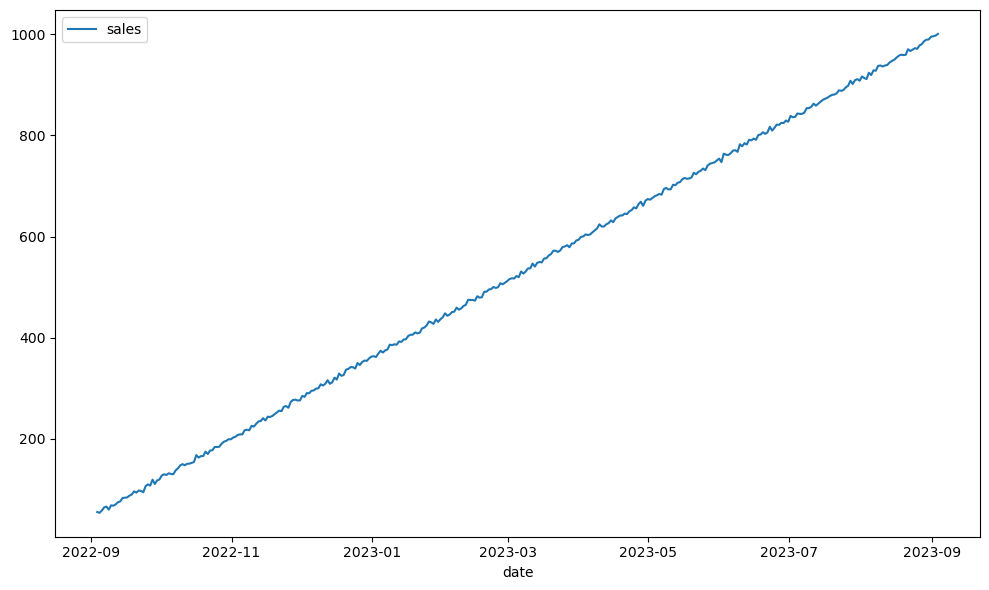

In [5]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df)

plt.tight_layout()
plt.show()

# 2. Trend Analysis

In [6]:
decomposition = seasonal_decompose(df, period = 12)
decomposition

## 2.1. Tendence

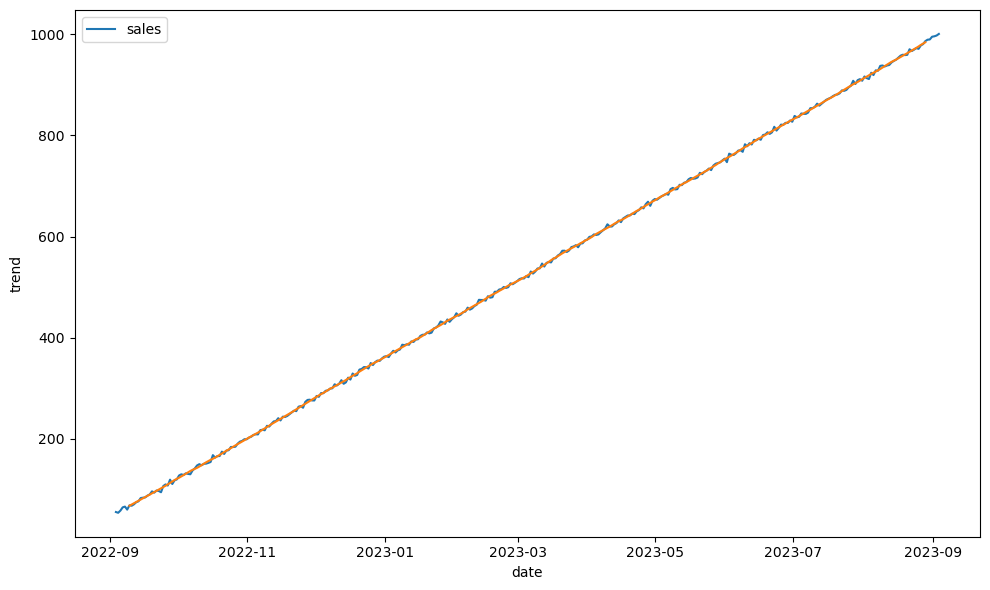

In [7]:
trend = decomposition.trend

plt.figure(figsize=(10,6))

sns.lineplot(data = df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

# 2.2. Seasonal Analysis

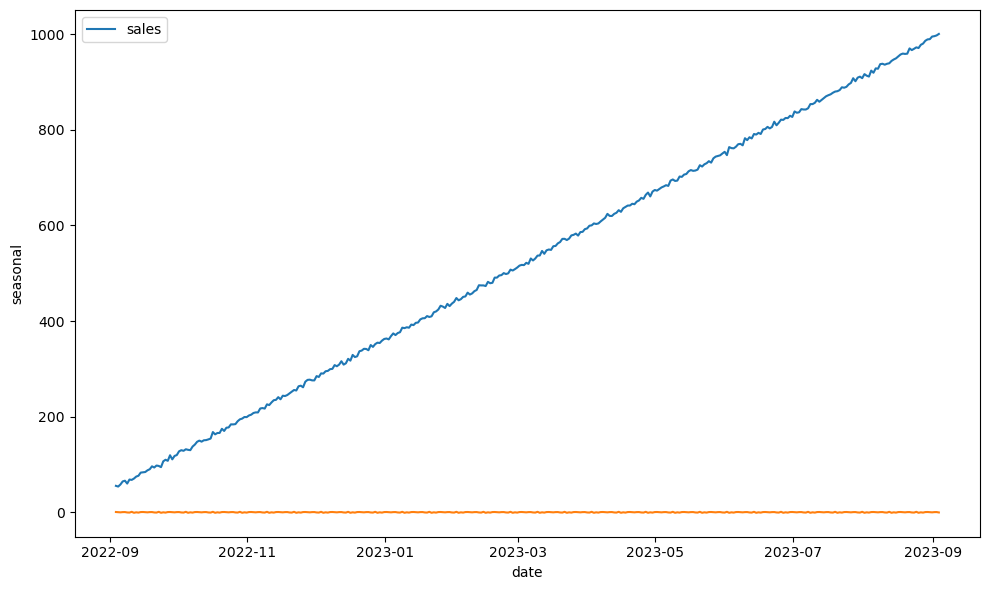

In [8]:
season = decomposition.seasonal

plt.figure(figsize=(10,6))

sns.lineplot(data = df)
sns.lineplot(data = season)

plt.tight_layout()

plt.show()

# 2.3. Dickey-Fuller

In [9]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

# 2.4. Variability Analisis

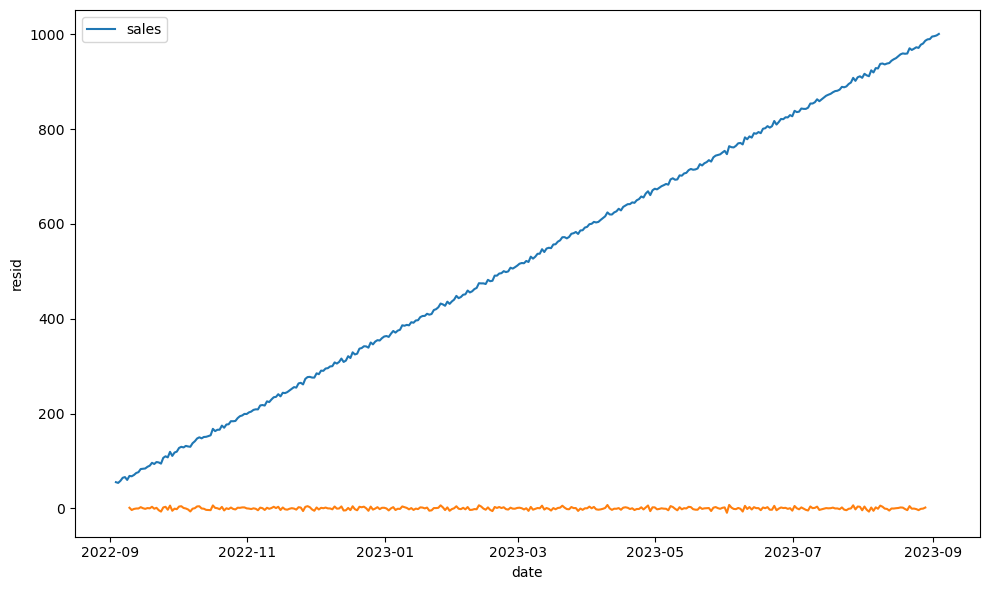

In [10]:
residual = decomposition.resid

plt.figure(figsize=(10,6))

sns.lineplot(data = df)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

# 2.5. Autocoreelation Analysis

<Figure size 1000x800 with 0 Axes>

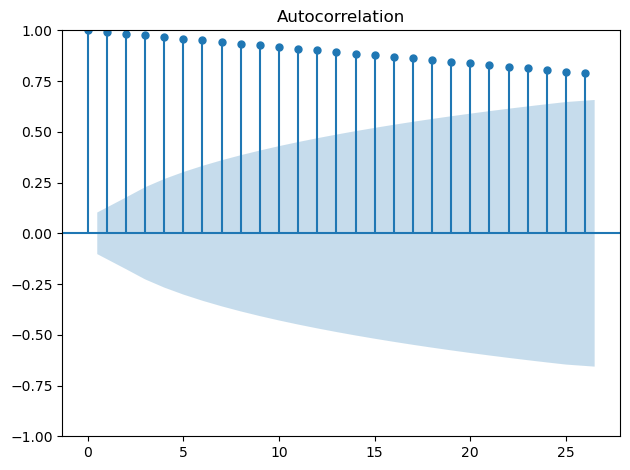

In [11]:
plt.figure(figsize=(10,8))

plot_acf(df)

plt.tight_layout()

plt.show()

# 3. Machine Learning

## 3.1 Transforming to stacionary

In [12]:
df_stationary = df.diff().dropna()

test_stationarity(df_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [13]:
model = auto_arima(df, seasonal = True, trace = True, m = 12)
dump(model, open(f"../models/arima_model.sav", "wb"))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1847.126, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1972.853, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1844.701, Time=0.94 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1843.274, Time=0.35 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1843.586, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1841.532, Time=0.27 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1843.436, Time=0.98 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.12 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1839.552, Time=0.15 sec
 ARIMA(1,1,1)(1,0,0)[12] inte

In [14]:
model_stationary = auto_arima(df_stationary, seasonal = True, trace = True, m = 12)
dump(model_stationary, open(f"../models/arima_model_stationary.sav", "wb"))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.122, Time=1.29 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1844.775, Time=1.41 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.049, Time=0.34 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=1.10 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.34 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.435, Time=0.98 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.25 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.17 sec
 ARIMA(1,0,1)(1,0,0)[12] inte

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Thu, 16 Jan 2025   AIC                           1839.552
Time:                        13:48:28   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
model_stationary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Thu, 16 Jan 2025   AIC                           1839.553
Time:                        13:48:28   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

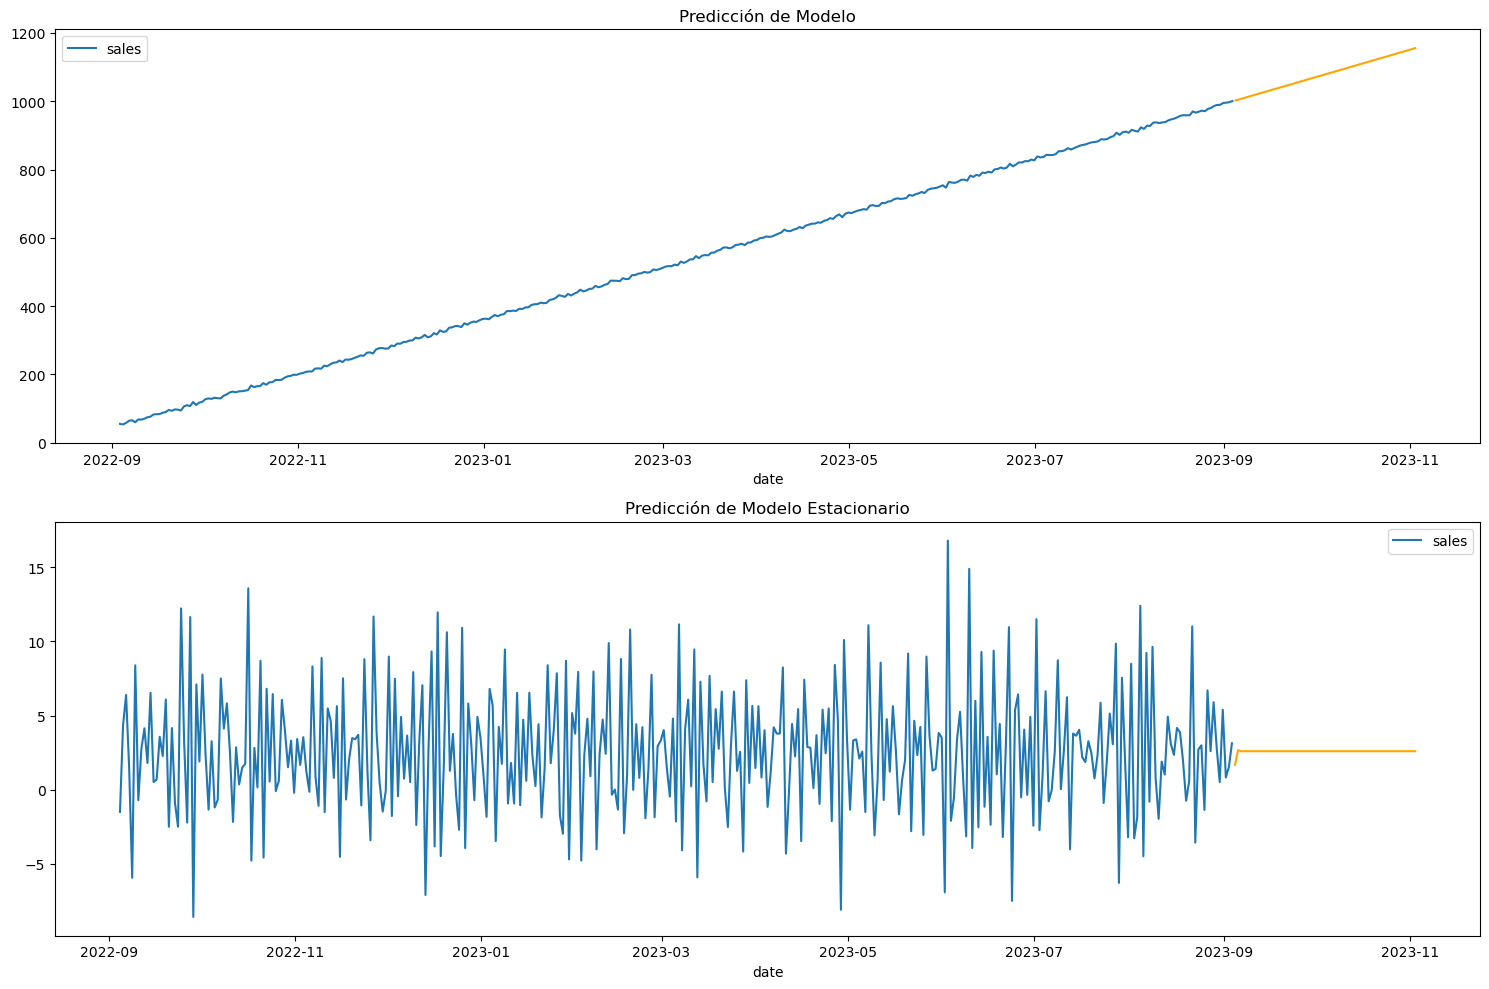

In [38]:
forecast = model.predict(60)
forecast_stationary = model_stationary.predict(60)

fig, ax = plt.subplots(nrows=2,figsize = (15, 10))

sns.lineplot(ax= ax[0] ,data = df)
sns.lineplot(ax= ax[0] ,data = forecast, c = "orange")
sns.lineplot(ax= ax[1] ,data = df_stationary)
sns.lineplot(ax= ax[1] ,data = forecast_stationary, c = "orange")

ax[0].set_title("Predicción de Modelo")
ax[1].set_title("Predicción de Modelo Estacionario")


plt.tight_layout()
plt.show()